In [1]:
# Aidan McEnaney
# February 16th, 2023
# Code developed for MCM 2023

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordfreq import word_frequency #https://pypi.org/project/wordfreq/
import csv
from itertools import accumulate, islice
from collections import Counter
import copy
from itertools import product
from itertools import dropwhile
from nltk.corpus import words
import math
import scipy
import string
import random

In [3]:
wordleData = pd.read_excel("Problem_C_Data_Wordle.xlsx")

header_row =wordleData.iloc[0]
df2 = pd.DataFrame(wordleData.values[1:], columns=header_row)
wordleData = df2.to_dict()

keys = list(wordleData.keys())
data = {}

for key in keys:
    tmp =[]
    
    for i in range(len(wordleData[key])):
        tmp.append(wordleData[key][i])
        
    data[key] = tmp
    
#print(keys)

In [4]:
tmp = []
tmp2 = []

for i in range(len(data["Date"])):
    tmp.append(data["Number in hard mode"][i]/(data[keys[3]][i]))
    tmp2.append(word_frequency(data["Word"][i], 'en'))

    
data["percentHardmode"] = tmp
data["wordFreq"] = tmp2
#print(tmp2)
data["wordFreqNorm"] = [x / max(tmp2) for x in tmp2]

In [5]:
# Program to write a dictionary of list to csv
  
# writing to csv file
with open("dataSum.csv", "w") as outfile:
    
    # creating a csv writer object
    writerfile = csv.writer(outfile)
      
    # writing dictionary keys as headings of csv
    writerfile.writerow(data.keys())
      
    # writing list of dictionary
    writerfile.writerows(zip(*data.values()))


In [7]:
for i in range(len(data['Word'])):
    data['Word'][i] = data['Word'][i].strip()


n = len(max(data["Word"], key=len))
c = Counter(s[j:i] for s in data["Word"] for j in range(len(s)+1) for i in range(0, min(n, 1+len(s))))

for key in copy.deepcopy(list(c.keys())):
    if (len(key) < 2):
        del c[key]
    
for key, count in dropwhile(lambda key_count: key_count[1] >= 2, c.most_common()):
    del c[key]
    
#print(c)

In [8]:
def findPatterns(words):
    n = len(max(words, key=len))
    c = Counter(s[j:i] for s in words for j in range(len(s)+1) for i in range(0, min(n+1, 1+len(s))))

    for key in copy.deepcopy(list(c.keys())):
        if (len(key) < 2):
            del c[key]
    
    for key, count in dropwhile(lambda key_count: key_count[1] >= 2, c.most_common()):
        del c[key]
    
    return c

In [9]:
my_file = open("Valid_Words.txt", "r")
  
# reading the file
dataFile = my_file.read().split('\n')
  
dataFile.pop(len(dataFile)-1)

pat = findPatterns(dataFile)

In [10]:
with open('patterns.csv','w') as csvfile:
    writer=csv.writer(csvfile)
    writer.writerows(pat.items())

In [11]:
word_list_tmp = words.words()
word_list = list(map(lambda x: x.lower(), word_list_tmp ))
word_list = list(set(word_list))
word_list = list(set(data["Word"]).union(set(word_list)))


In [12]:
# Program to write a dictionary of list to csv
stuff = {}

for i in word_list:
    stuff[i] = word_frequency(i, 'en')
    #stuff.append([i, word_frequency(i, 'en')])
    
with open('wordFreqTotal.csv','w') as csvfile:
    writer=csv.writer(csvfile)
    writer.writerows(stuff.items())

In [13]:
pat = findPatterns(word_list)

with open('patternsNew.csv','w') as csvfile:
    writer=csv.writer(csvfile)
    writer.writerows(pat.items())

In [14]:
#Get combinations without order

pat2 = {}
pat3 = {}
pat4 = {}

for key in copy.deepcopy(list(pat.keys())):
    if (len(key) == 2):
        combs = [''.join(comb) for comb in product(list(key), repeat=len(list(key)))]
        for el in combs:
            if el in pat2:
                break
            pat2[key] = pat[key]
    elif (len(key) == 3):
        combs = [''.join(comb) for comb in product(list(key), repeat=len(list(key)))]
        for el in combs:
            if el in pat3:
                break
            pat3[key] = pat[key]
    elif (len(key) == 4):
        combs = [''.join(comb) for comb in product(list(key), repeat=len(list(key)))]
        for el in combs:
            if el in pat4:
                break
            pat4[key] = pat[key]


#Normalize each of the pattern length dictionaries

maxVal2 = pat2[max(pat2, key=pat2.get)]
pat2 = {k: v/maxVal2 for k, v in pat2.items()}

maxVal3 = pat3[max(pat3, key=pat3.get)]
pat3 = {k: v/maxVal3 for k, v in pat3.items()}

maxVal4 = pat4[max(pat4, key=pat4.get)]
pat4 = {k: v/maxVal4 for k, v in pat4.items()}

maxVal = pat[max(pat, key=pat.get)]
pat = {k: v/maxVal for k, v in pat.items()}


In [15]:
def weightFunction(x):    
    if (x < 10**(-5)):
        #return 3*10**(-3)
        return 5*10**(-3)
    elif (10**(-5) < x and x < 5*(10**(-5))):
        #return 5 * 10**(-3)
        return 7 * 10**(-3)
    elif (5*(10^(-5) < x and x < 10**(-4))):
        #return 9*10**(-3)
        return 8*10**(-3)
    elif (10**(-4) < x and x < 9 * (10**(-4))):
        #return 10**(-2)
        return 9*10**(-3)
    elif (9*(10**(-4)) < x and x < 5 * (10**(-3))): # was added
        #return 10**(-2)
        return 9.5*10**(-3)
    else:
        #return 5*10**(-2)
        return 10**(-2)
    
def weightFunctionOld(x):    
    if (x < 10**(-5)):
        return 3*10**(-3)
        #return 5*10**(-3)
    elif (10**(-5) < x and x < 5*(10**(-5))):
        return 5 * 10**(-3)
        #return 7 * 10**(-3)
    elif (5*(10^(-5) < x and x < 10**(-4))):
        return 9*10**(-3)
        #return 8*10**(-3)
    elif (10**(-4) < x and x < 5 * (10**(-4))):
        return 10**(-2)
        #return 9*10**(-3)
    else:
        return 5*10**(-2)
        #return 10**(-2)

def wordFreqScore(word):
    score = 0
    words = [word]
    n = len(max(words, key=len))
    c = Counter(s[j:i] for s in words for j in range(len(s)+1) for i in range(0, min(n+1, 1+len(s))))

    for key in copy.deepcopy(list(c.keys())):
        if (len(key) < 2):
            del c[key]
    
    for key, count in dropwhile(lambda key_count: key_count[1] >= 0, c.most_common()):
        del c[key]
        
    for key in c.keys():
        if (key in pat):
            if (len(key) == 2):
                score += 2*pat[key]
            elif (len(key) == 3):
                score += 2*1.15*(pat[key]*maxVal)/maxVal3
            elif (len(key) == 4):
                score += 2*1.2*(pat[key]*maxVal)/maxVal4
    
    #print(score)
    score = score  * weightFunction(word_frequency(word, 'en'))
    
    return score

In [16]:
print(wordFreqScore("mummy"))
print(weightFunction(word_frequency("mummy", 'en')))
print(wordFreqScore("where"))
print(weightFunction(word_frequency("where", 'en')))

0.0034948802050537163
0.005
0.04963821111753883
0.0095


In [17]:
file = open("UsefulData.csv", "r")
dataScore = list(csv.reader(file, delimiter=","))
file.close()

dataScore.pop(0)
dataScore[0]

['manly', '4.34']

In [18]:
scoreData = {}

for i in dataScore:
    scoreData[i[0]] = i[1]


In [19]:
def wordFreqScoreData(word):
    retList = []
    score1 = 0
    score2 = 0
    score3 = 0
    words = [word]
    n = len(max(words, key=len))
    c = Counter(s[j:i] for s in words for j in range(len(s)+1) for i in range(0, min(n+1, 1+len(s))))

    for key in copy.deepcopy(list(c.keys())):
        if (len(key) < 2):
            del c[key]
    
    for key, count in dropwhile(lambda key_count: key_count[1] >= 0, c.most_common()):
        del c[key]
        
    for key in c.keys():
        if (len(key) == 2):
            if (key in pat):
                score1 += pat[key]
    for key in c.keys():
        if (len(key) == 3):
            if (key in pat):
                score2 += (pat[key]*maxVal)/maxVal3
    for key in c.keys():
        if (len(key) == 4):
            if (key in pat):
                score3 += (pat[key]*maxVal)/maxVal4
    retList.append([word, score1, score2, score3, weightFunction(word_frequency(word, 'en')), scoreData[word]])
    
    #print(score)
    #score = score  * weightFunction(word_frequency(word, 'en'))
    
    return retList

def wordFreqScoreDataNew(word):
    retList = []
    score1 = 0
    score2 = 0
    score3 = 0
    words = [word]
    n = len(max(words, key=len))
    c = Counter(s[j:i] for s in words for j in range(len(s)+1) for i in range(0, min(n+1, 1+len(s))))

    for key in copy.deepcopy(list(c.keys())):
        if (len(key) < 2):
            del c[key]
    
    for key, count in dropwhile(lambda key_count: key_count[1] >= 0, c.most_common()):
        del c[key]
        
    for key in c.keys():
        if (len(key) == 2):
            if (key in pat):
                score1 += pat[key]
    for key in c.keys():
        if (len(key) == 3):
            if (key in pat):
                score2 += (pat[key]*maxVal)/maxVal3
    for key in c.keys():
        if (len(key) == 4):
            if (key in pat):
                score3 += (pat[key]*maxVal)/maxVal4
    retList.append([word, score1, score2, score3, weightFunction(word_frequency(word, 'en')), 0])
    
    #print(score)
    #score = score  * weightFunction(word_frequency(word, 'en'))
    
    return retList

def wordFreqScoreDataOld(word):
    retList = []
    score1 = 0
    score2 = 0
    score3 = 0
    words = [word]
    n = len(max(words, key=len))
    c = Counter(s[j:i] for s in words for j in range(len(s)+1) for i in range(0, min(n+1, 1+len(s))))

    for key in copy.deepcopy(list(c.keys())):
        if (len(key) < 2):
            del c[key]
    
    for key, count in dropwhile(lambda key_count: key_count[1] >= 0, c.most_common()):
        del c[key]
        
    for key in c.keys():
        if (len(key) == 2):
            if (key in pat):
                score1 += pat[key]
    for key in c.keys():
        if (len(key) == 3):
            if (key in pat):
                score2 += (pat[key]*maxVal)/maxVal3
    for key in c.keys():
        if (len(key) == 4):
            if (key in pat):
                score3 += (pat[key]*maxVal)/maxVal4
    retList.append([word, score1, score2, score3, weightFunctionOld(word_frequency(word, 'en')), scoreData[word]])
    
    #print(score)
    #score = score  * weightFunction(word_frequency(word, 'en'))
    
    return retList

In [20]:
print(wordFreqScoreData("spell"))

[['spell', 0.9693441345268181, 0.3865523218684427, 0.032943391152346374, 0.007, '4.09']]


In [21]:
toCSV = []
for key in scoreData.keys():
    toCSV.append(wordFreqScoreData(key))


for i in range(len(toCSV)):
    toCSV[i] = toCSV[i][0]
toCSV.insert(0, ["Word", "2L Score", "3 L Score", "4L Score", "f(Freq)", "AVG Val (Actual)"])

In [22]:
toCSV3 = wordFreqScoreDataNew('eerie')
print(toCSV3)

0.0940223424104296
1.0
0.546586051345032
0.09440022673059209
[['eerie', 1.7350086204860538, 0.5282364747741994, 0.023262068038187443, 0.005, 0]]


In [23]:
with open('projected.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(toCSV)
  


In [24]:
toCSV2 = []
for key in scoreData.keys():
    toCSV2.append(wordFreqScoreDataOld(key))

for i in range(len(toCSV2)):
    toCSV2[i] = toCSV2[i][0]
toCSV2.insert(0, ["Word", "2L Score", "3 L Score", "4L Score", "f(Freq)", "AVG Val (Actual)"])

with open('oldProjected.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(toCSV2)

In [25]:
file = open("smoothedVTime.csv", "r")
toPlot = list(csv.reader(file, delimiter=","))
file.close()

In [26]:
toPlotx =[]
toPloty =[]

for i in toPlot:
    toPlotx.append(i[0])
    toPloty.append(i[1])
    
#toPlotx.reverse()
toPloty.reverse()
toPlotx = [int(x) - (301+58) for x in toPlotx]

#print(toPlotx[300:])
#print(toPloty[300:])
#print(toPloty[0:len(toPloty)-220])

def func(x, a, b, c):
    return a*x**2+b*x+c

#plt.plot(toPlotx[190:], toPloty[0:len(toPloty)-190])

params = scipy.optimize.curve_fit(func, toPlotx[300:], toPloty[300:])

print(params)

(array([-5.11214525e-01, -1.68472418e+02,  1.99379717e+04]), array([[1.04481867e-02, 6.05994845e-01, 5.75695109e+00],
       [6.05994845e-01, 3.75695920e+01, 4.04137985e+02],
       [5.75695109e+00, 4.04137985e+02, 5.91123787e+03]]))


In [27]:
#https://www.desmos.com/calculator/ezt6h1gern

In [28]:
def linearfunc(time):
    return (-109*((time+174)/(1.019)))+39346+15*time**(1.25)+8*time

def loyalfunc(time):
    num = 15554/(math.log(time,10))
    num = num * math.e**(1/time**4)
    return num

def distanceFunc(p1, p2):
    return abs(p1 - p2)

def stochModel(time, flips, curPops):
    up = 0.4
    down = 0.60
    recent = [0, 0] # [up, down]
    
    if (isinstance(curPops, list)):
        curPop = curPops[0]
    else:
        curPop = curPops
    
    for i in flips[-3:]:
        if (i == 0):
            recent[1] += 1
        elif (i == 1):
            recent[0] += 1
            
    behav = recent.index(max(recent))
    
    for i in range(max(recent)):
        if (behav == 0):
            down += 0.05
            up -= 0.05
        elif (behav == 1):
            up += 0.05
            down -= 0.05
            
    dist = distanceFunc(curPop, predModel(time))
    
    if (dist > 300):
        if ((curPop - predModel(time)) > 0):
            down += 0.4
            up -= 0.4
        elif ((curPop - predModel(time)) < 0):
            down -= 0.36
            up += 0.36
    if (down > 1):
        down ==1
    elif (up > 1):
        up == 1
    if (down == 1):
        down -= 0.02
        up += 0.02
    elif (up == 1):
        down += 0.02
        up -= 0.02
    
    curFlip = random.choices([0,1], [down, up])[0]
    
    flips.append(curFlip)
    
    if (curFlip == 0):
        #curPop -= 100
        curPop -= random.uniform(80, 150)
    elif (curFlip == 1):
        curPop += random.uniform(80, 150)
        
    
    return [flips, curFlip, curPop]

def predModel(time): 
    # time here is days since data collection stopped,
    # 12/31/22
    if (time > -100 and time < 700):
        return linearfunc(time)
    elif (time > 699):
        return loyalfunc(time)
    

def getPop(time):
    flips = [[], [], predModel(0)]
    
    for i in range(time):
        flips = stochModel(i, flips[0], flips[2])
        
    return flips
    

In [29]:
time = []
pop1 = []
pop2 = []

for i in range(125):
    time.append(i)
    pop1.append(getPop(i)[2])
    pop2.append(predModel(i))


print("Time = 10")
print(getPop(10)[2])
print(predModel(10))

print("Time = 30")
print(getPop(30)[2])
print(predModel(30))

print("Time = 50")
print(getPop(50)[2])
print(predModel(50))

print("Time = 60")
print(getPop(60)[2])
print(predModel(60))

print("Time = 70")
print(getPop(70)[2])
print(predModel(70))

print("Time = 100")
print(getPop(100)[2])
print(predModel(100))

print("Time = 1000")
print(getPop(1000)[2])
print(predModel(1000))

print("Time = 10000")
print(getPop(10000)[2])
print(predModel(10000))

Time = 10
20261.78790085956
20010.700694626546
Time = 30
19004.911042970503
18817.762770632497
Time = 50
18109.95296563153
17779.61513211001
Time = 60
17365.336414368343
17300.419933006742
Time = 70
17018.441469958943
16843.03485351814
Time = 100
15900.148759968693
15580.28989555188
Time = 1000
4861.80409660975
5184.666666671853
Time = 10000
3667.2639551700304
3888.5


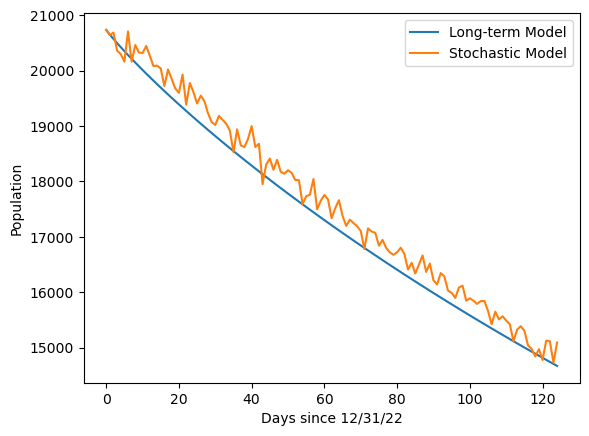

In [30]:
plt.plot(time, pop2, label = "Long-term Model")
plt.plot(time, pop1, label = "Stochastic Model")
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Days since 12/31/22")
plt.ylabel("Population")
#plt.plot(ns, 1/(ns**2), label = "1/n^2 scaling")
plt.legend()

In [31]:
with open("longModel.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows([time, pop2])

In [32]:
val60 = []

for j in range(10000):
    time = []
    pop1 = []
    pop2 = []
    for i in range(60):
        time.append(i)
        pop1.append(getPop(i)[2])
        pop2.append(predModel(i))
    val60.append(pop1[59])

In [33]:
print(max(val60))
print(min(val60))
print(sum(val60)/len(val60))

18314.64614322232
16898.966396071497
17645.397010806926


In [34]:
def labelFunction(x):    
    if (x < 10**(-5)):
        #return 3*10**(-3)
        return 1
    elif (10**(-5) < x and x < 5*(10**(-5))):
        #return 5 * 10**(-3)
        return 2
    elif (5*(10^(-5) < x and x < 10**(-4))):
        #return 9*10**(-3)
        return 3
    elif (10**(-4) < x and x < 9 * (10**(-4))):
        #return 10**(-2)
        return 4
    elif (9*(10**(-4)) < x and x < 5 * (10**(-3))): # was added
        #return 10**(-2)
        return 5
    else:
        #return 5*10**(-2)
        return 6
    
def wordFreqScoreData2(word):
    retList = []
    score1 = 0
    score2 = 0
    score3 = 0
    words = [word]
    n = len(max(words, key=len))
    c = Counter(s[j:i] for s in words for j in range(len(s)+1) for i in range(0, min(n+1, 1+len(s))))

    for key in copy.deepcopy(list(c.keys())):
        if (len(key) < 2):
            del c[key]
    
    for key, count in dropwhile(lambda key_count: key_count[1] >= 0, c.most_common()):
        del c[key]
        
    for key in c.keys():
        if (len(key) == 2):
            if (key in pat):
                score1 += pat[key]
    for key in c.keys():
        if (len(key) == 3):
            if (key in pat):
                score2 += (pat[key]*maxVal)/maxVal3
    for key in c.keys():
        if (len(key) == 4):
            if (key in pat):
                score3 += (pat[key]*maxVal)/maxVal4
    retList.append([word, score1, score2, score3, labelFunction(word_frequency(word, 'en')), scoreData[word]])
    
    #print(score)
    #score = score  * weightFunction(word_frequency(word, 'en'))
    
    return retList

In [35]:
toCSV = []
for key in scoreData.keys():
    toCSV.append(wordFreqScoreData2(key))

for i in range(len(toCSV)):
    toCSV[i] = toCSV[i][0]
toCSV.insert(0, ["Word", "2L Score", "3 L Score", "4L Score", "f(Freq)", "AVG Val (Actual)"])

In [36]:
with open('strata.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(toCSV)

In [37]:
letters = list(string.ascii_lowercase)
letterFreq = {}
length = len(word_list)

for i in letters:
    count = 0
    for j in word_list:
        if(i in j):
            count += 1
    letterFreq[i] = count/length

In [38]:
with open('letterFreq.csv','w') as csvfile:
    writer=csv.writer(csvfile)
    writer.writerows(letterFreq.items())

In [39]:
letterComb = {}

for i in data['Word']:
    counts = []
    for j in range(len(letters)):
        if (letters[j] in i):
            counts.append(1)
        else:
            counts.append(0)
    letterComb[i] = counts
            